<a href="https://colab.research.google.com/github/Ami1ra1/projects/blob/main/QVI_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load data from CSV file
file_path = 'QVI_data.csv'  # Specify the path to your CSV file if it is located in a different folder
df = pd.read_csv(file_path)

# Display some information about the data to ensure it is loaded correctly
print(df.head())



   LYLTY_CARD_NBR        DATE  STORE_NBR  TXN_ID  PROD_NBR  \
0            1000  2018-10-17          1       1         5   
1            1002  2018-09-16          1       2        58   
2            1003  2019-03-07          1       3        52   
3            1003  2019-03-08          1       4       106   
4            1004  2018-11-02          1       5        96   

                                PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
0  Natural Chip        Compny SeaSalt175g         2        6.0        175   
1   Red Rock Deli Chikn&Garlic Aioli 150g         1        2.7        150   
2   Grain Waves Sour    Cream&Chives 210G         1        3.6        210   
3  Natural ChipCo      Hony Soy Chckn175g         1        3.0        175   
4          WW Original Stacked Chips 160g         1        1.9        160   

        BRAND              LIFESTAGE PREMIUM_CUSTOMER  
0     NATURAL  YOUNG SINGLES/COUPLES          Premium  
1         RRD  YOUNG SINGLES/COUPLES       Mainstrea

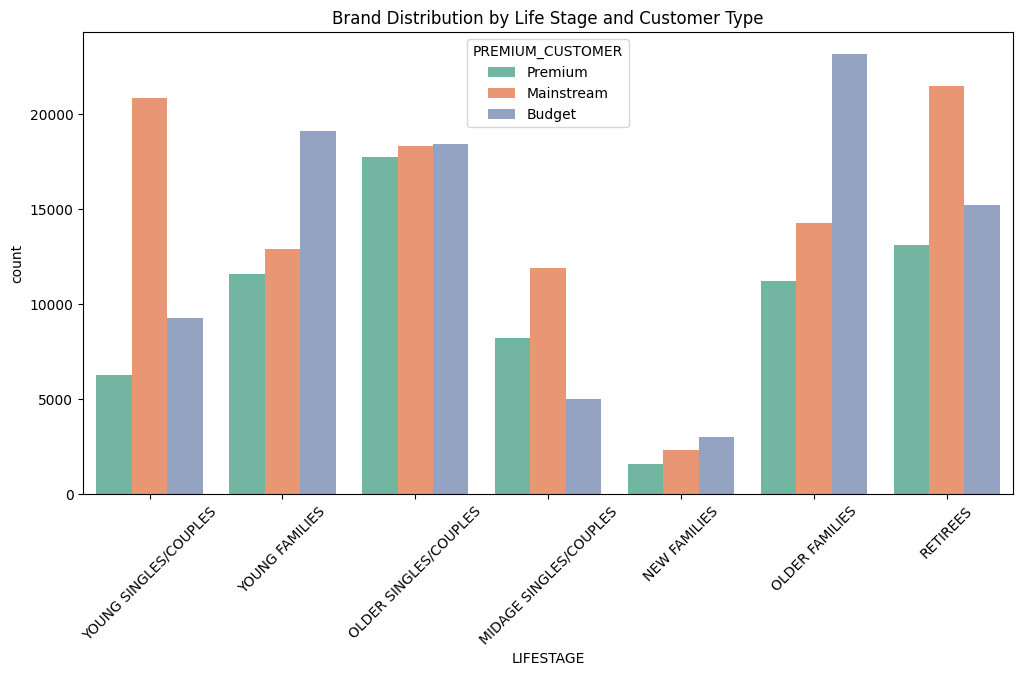

In [3]:
# Bar plot of sales distribution by life stage and customer type
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='LIFESTAGE', hue='PREMIUM_CUSTOMER', palette='Set2')
plt.title('Brand Distribution by Life Stage and Customer Type')
plt.xticks(rotation=45)
plt.show()

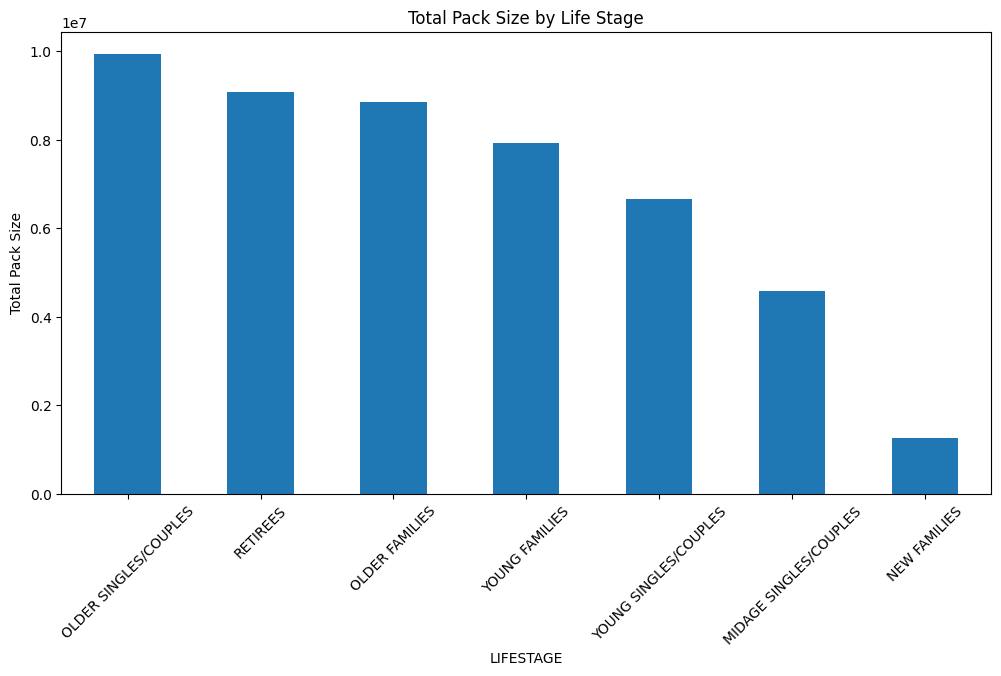

In [4]:
sales_by_lifestage = df.groupby('LIFESTAGE')['PACK_SIZE'].sum().sort_values(ascending=False)
sales_by_lifestage.plot(kind='bar', figsize=(12, 6))
plt.title('Total Pack Size by Life Stage')
plt.ylabel('Total Pack Size')
plt.xticks(rotation=45)
plt.show()

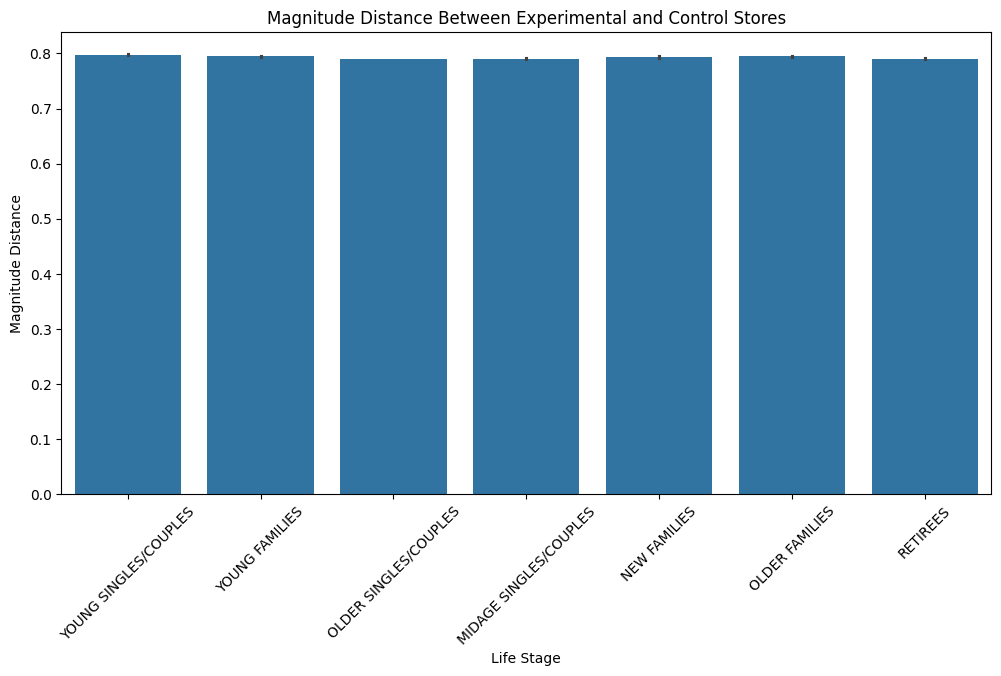

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x='LIFESTAGE', y='magnitude_distance', data=comparison_df)
plt.title('Magnitude Distance Between Experimental and Control Stores')
plt.xlabel('Life Stage')
plt.ylabel('Magnitude Distance')
plt.xticks(rotation=45)
plt.show()


In [11]:
sales_data = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    total_sales=('PACK_SIZE', 'sum'),
    total_customers=('PACK_SIZE', 'count'),
    avg_transactions_per_customer=('PACK_SIZE', lambda x: x.count() / len(x.unique()))
).reset_index()
print(sales_data.head())

                LIFESTAGE PREMIUM_CUSTOMER  total_sales  total_customers  \
0  MIDAGE SINGLES/COUPLES           Budget       904541             5020   
1  MIDAGE SINGLES/COUPLES       Mainstream      2191736            11874   
2  MIDAGE SINGLES/COUPLES          Premium      1491844             8216   
3            NEW FAMILIES           Budget       544391             3005   
4            NEW FAMILIES       Mainstream       422451             2325   

   avg_transactions_per_customer  
0                     239.047619  
1                     565.428571  
2                     391.238095  
3                     143.095238  
4                     110.714286  


In [12]:
control_stores = sales_data[sales_data['total_sales'] == sales_data['total_sales'].max()]
print("Control stores: \n", control_stores)

Control stores: 
         LIFESTAGE PREMIUM_CUSTOMER  total_sales  total_customers  \
6  OLDER FAMILIES           Budget      4226404            23160   

   avg_transactions_per_customer  
6                    1102.857143  


In [26]:
# Step 1: Calculate the magnitude distance (absolute difference between sales) for experimental and control stores
df['magnitude_distance'] = 1 - (abs(df['TOT_SALES'] - df['TOT_SALES'].min()) /
                                (df['TOT_SALES'].max() - df['TOT_SALES'].min()))


In [27]:
# Step 2: Create the comparison dataframe
# Assume that you have experimental and control stores in your dataframe
# Here, we'll use a subset of the data with the relevant columns
comparison_df = df[['LIFESTAGE', 'TOT_SALES', 'magnitude_distance']]


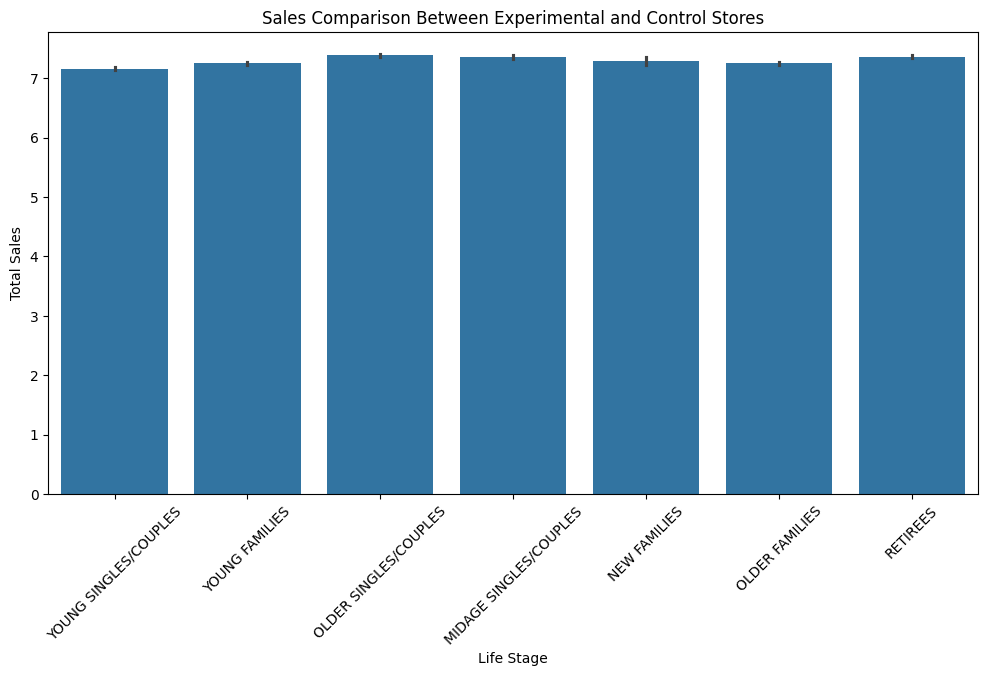

In [28]:
# Step 3: Plot the results using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', data=comparison_df)
plt.title('Sales Comparison Between Experimental and Control Stores')
plt.xlabel('Life Stage')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [40]:
# Step 4: Compare experimental stores with control stores for sales differences
# Assuming the control stores have been defined earlier as control_stores

# Create a dataframe for experimental stores comparison
comparison_results = []



In [36]:
# Loop through each experimental store and compare it with control stores
for life_stage in df['LIFESTAGE'].unique():
    for premium_type in df['PREMIUM_CUSTOMER'].unique():
        # Filter the experimental and control stores
        experimental_data = df[(df['LIFESTAGE'] == life_stage) & (df['PREMIUM_CUSTOMER'] == premium_type)]
        control_data = df[(df['LIFESTAGE'] == 'OLDER FAMILIES') & (df['PREMIUM_CUSTOMER'] == 'Budget')]  # Adjust based on control store criteria

        # Calculate sales comparison and magnitude distance
        if not experimental_data.empty and not control_data.empty:
            experiment_sales = experimental_data['TOT_SALES'].sum()
            control_sales = control_data['TOT_SALES'].sum()
            magnitude_distance = abs(experiment_sales - control_sales) / max(experiment_sales, control_sales)

            comparison_results.append({
                'LIFESTAGE': life_stage,
                'PREMIUM_CUSTOMER': premium_type,
                'experiment_sales': experiment_sales,
                'control_sales': control_sales,
                'magnitude_distance': magnitude_distance
            })

# Convert comparison results into a DataFrame
comparison_df = pd.DataFrame(comparison_results)

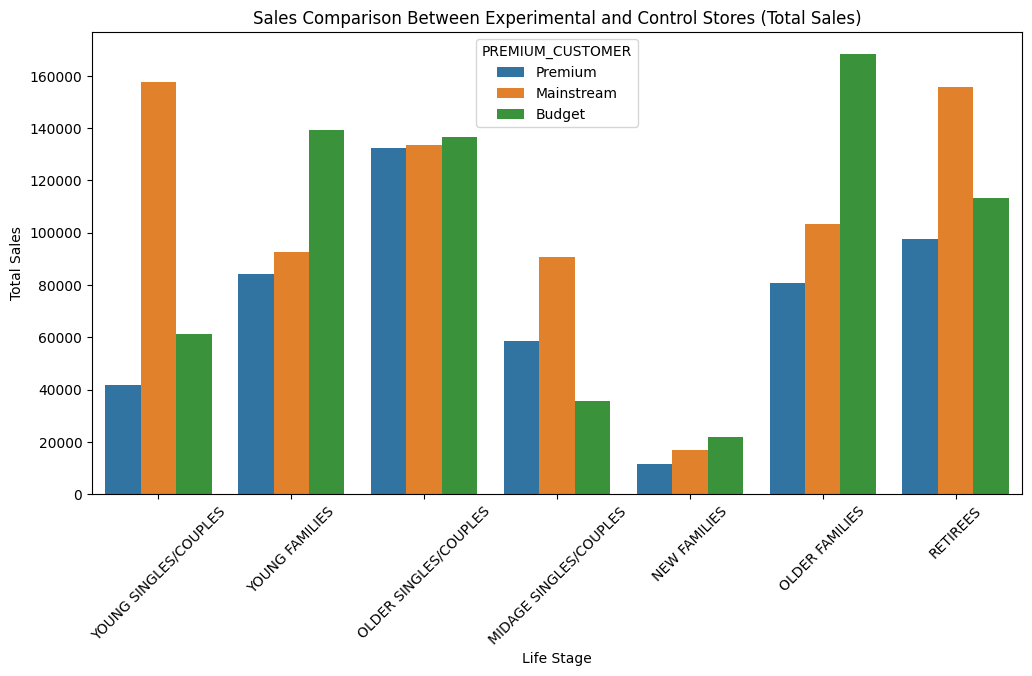

In [37]:
# Step 5: Plot the comparison results (Total Sales)
plt.figure(figsize=(12, 6))
sns.barplot(x='LIFESTAGE', y='experiment_sales', hue='PREMIUM_CUSTOMER', data=comparison_df)
plt.title('Sales Comparison Between Experimental and Control Stores (Total Sales)')
plt.xlabel('Life Stage')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

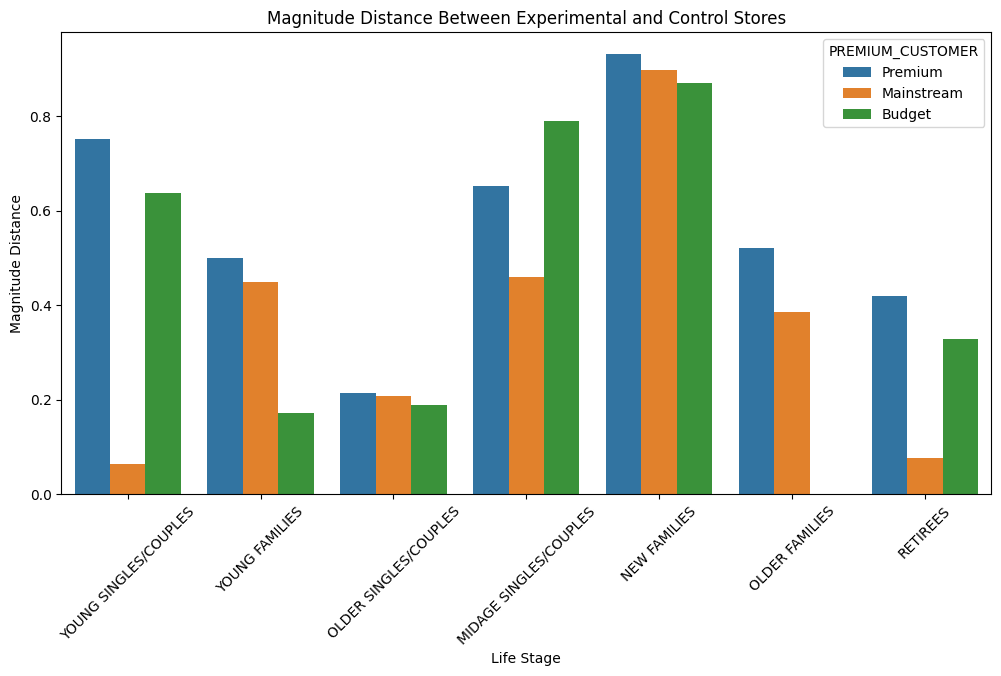

In [38]:
# Step 6: Plot magnitude distance
plt.figure(figsize=(12, 6))
sns.barplot(x='LIFESTAGE', y='magnitude_distance', hue='PREMIUM_CUSTOMER', data=comparison_df)
plt.title('Magnitude Distance Between Experimental and Control Stores')
plt.xlabel('Life Stage')
plt.ylabel('Magnitude Distance')
plt.xticks(rotation=45)
plt.show()

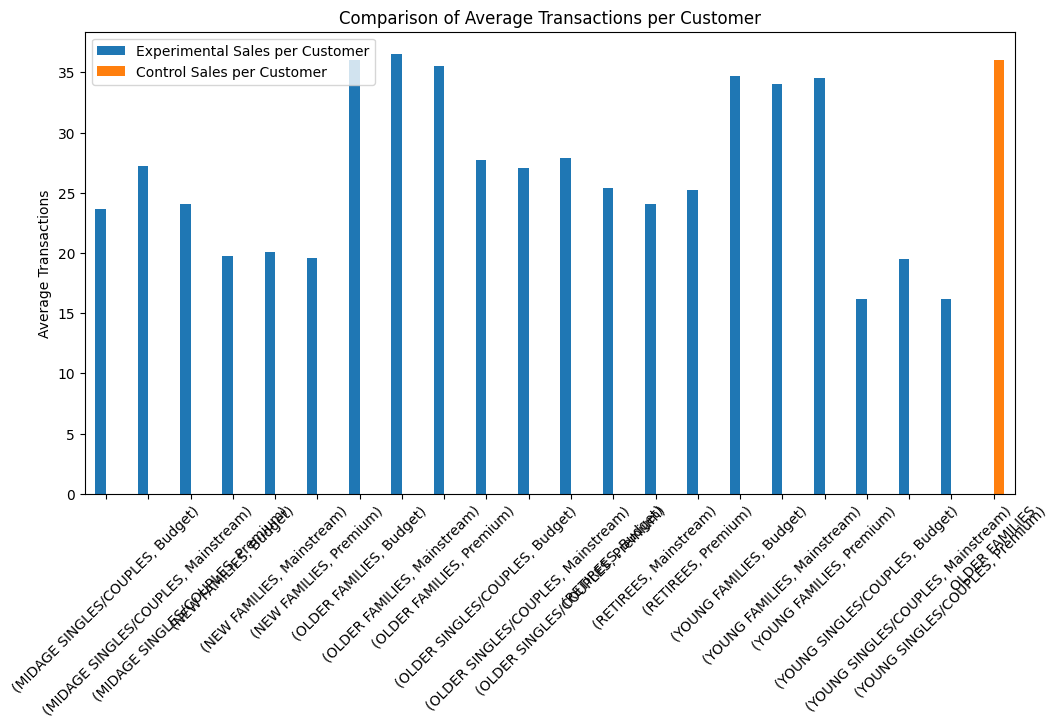

In [39]:
# Step 7: Further Analysis - Average Transactions per Customer
# Calculate average transactions per customer for experimental stores and control stores
experimental_avg_txns = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum() / df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique()

# Merge with control stores (assuming control store data is available)
# Example control store data with 'OLDER FAMILIES' and 'Budget' as life stage & premium type
control_avg_txns = df[(df['LIFESTAGE'] == 'OLDER FAMILIES') & (df['PREMIUM_CUSTOMER'] == 'Budget')].groupby('LIFESTAGE')['TOT_SALES'].sum() / df[(df['LIFESTAGE'] == 'OLDER FAMILIES') & (df['PREMIUM_CUSTOMER'] == 'Budget')].groupby('LIFESTAGE')['LYLTY_CARD_NBR'].nunique()

# Combine the results
txn_comparison_df = pd.concat([experimental_avg_txns, control_avg_txns], axis=1, keys=['Experimental', 'Control'])
txn_comparison_df.columns = ['Experimental Sales per Customer', 'Control Sales per Customer']

# Plot the comparison for Average Transactions per Customer
txn_comparison_df.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Average Transactions per Customer')
plt.ylabel('Average Transactions')
plt.xticks(rotation=45)
plt.show()


In [41]:
from scipy import stats

# تنفيذ اختبار t لمقارنة المتوسطات
t_stat, p_value = stats.ttest_ind(experimental_avg_txns, control_avg_txns)

# عرض النتيجة
print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("The difference is statistically significant.")
else:
    print("The difference is not statistically significant.")


T-statistic: -1.4101933561923423, P-value: 0.17384596517421516
The difference is not statistically significant.


In [43]:
from scipy.stats import ttest_ind

# بيانات المبيعات لمتاجر التجربة (Stores 77, 86, 88)
experiment_stores = df[df['STORE_NBR'].isin([77, 86, 88])]
control_stores = df[~df['STORE_NBR'].isin([77, 86, 88])]

# مقارنة المبيعات الإجمالية بين التجربة والتحكم
experiment_sales = experiment_stores.groupby(['STORE_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum()
control_sales = control_stores.groupby(['STORE_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum()

# اختبار T للمقارنة بين المبيعات التجريبية والمبيعات في المتاجر المسيطرة
t_stat, p_val = ttest_ind(experiment_sales, control_sales, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

# إذا كانت قيمة P أقل من 0.05 فهذا يشير إلى فرق معنوي بين المجموعات
if p_val < 0.05:
    print("There is a significant difference in sales between experimental and control stores.")
else:
    print("There is no significant difference in sales between experimental and control stores.")


T-statistic: 2.23036158983112, P-value: 0.029295266893069653
There is a significant difference in sales between experimental and control stores.


In [44]:
# نحسب إجمالي عدد العملاء ومتوسط المعاملات لكل عميل
experiment_customers = experiment_stores.groupby(['STORE_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique()
control_customers = control_stores.groupby(['STORE_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique()

experiment_txns = experiment_stores.groupby(['STORE_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'])['TXN_ID'].count()
control_txns = control_stores.groupby(['STORE_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'])['TXN_ID'].count()

# نحسب متوسط المعاملات لكل عميل
experiment_avg_txns_per_customer = experiment_txns / experiment_customers
control_avg_txns_per_customer = control_txns / control_customers


customer_diff = experiment_customers - control_customers
txn_diff = experiment_avg_txns_per_customer - control_avg_txns_per_customer

print("Difference in number of customers between experimental and control stores:")
print(customer_diff)

print("Difference in average transactions per customer between experimental and control stores:")
print(txn_diff)


Difference in number of customers between experimental and control stores:
STORE_NBR  LIFESTAGE               PREMIUM_CUSTOMER
1          MIDAGE SINGLES/COUPLES  Budget             NaN
                                   Mainstream         NaN
                                   Premium            NaN
           NEW FAMILIES            Budget             NaN
                                   Mainstream         NaN
                                                       ..
272        YOUNG FAMILIES          Mainstream         NaN
                                   Premium            NaN
           YOUNG SINGLES/COUPLES   Budget             NaN
                                   Mainstream         NaN
                                   Premium            NaN
Name: LYLTY_CARD_NBR, Length: 5410, dtype: float64
Difference in average transactions per customer between experimental and control stores:
STORE_NBR  LIFESTAGE               PREMIUM_CUSTOMER
1          MIDAGE SINGLES/COUPLES  Budget  

In [51]:
!pip install fpdf


  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=411bc373d710a378605e056eaea1aea072aad9b40e6c5aefdba5b10efd9cc1df
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


In [59]:
from fpdf import FPDF

# Create PDF instance
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()

# Set font for title
pdf.set_font("Arial", size=16, style='B')
pdf.cell(200, 10, txt="QVI Data Analysis - Store Experiment", ln=True, align='C')

# Set font for content
pdf.set_font("Arial", size=12)

# Add some content (you can replace this with your analysis summary or other details)
pdf.ln(10)  # Line break
pdf.multi_cell(0, 10, txt="This document contains the analysis of the store experiment conducted in stores 77, 86, and 88. "
                          "The analysis compares total sales, number of customers, and average transactions per customer "
                          "between experimental and control stores. The results and further insights will help guide business decisions.")

# Save the file as PDF in the correct path
output_pdf_path = "/content/store_experiment_analysis_code.pdf"
pdf.output(output_pdf_path)

# Notify the user
print(f"PDF file has been saved: {output_pdf_path}")



PDF file has been saved: /content/store_experiment_analysis_code.pdf


In [60]:
from google.colab import files
files.download(output_pdf_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>